In [1]:
import numpy as np
import matplotlib.pyplot as plt

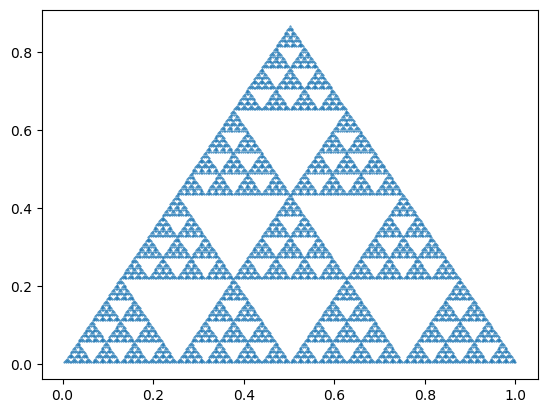

In [17]:
xmin, xmax = 0, 1
ymin, ymax = 0, np.sqrt(3)/2

num = 3

xstep = xmax / (num)
ystep = ymax / (num)

x = xmin
y = ymin

X = []
Y = []

points = []

for i in range(num + 1, -1, -1):
    for j in range(i):
        # print(x + xstep * j, y)
        points.append((x + xstep * j, y))
    
    x += xstep / 2
    y += ystep 

def generateAffineTransformation(num, point):
    def affineTransformation(x):
        b = np.array([point[0], point[1]])
        return (1 / (num + 1)) * (x - b) + b
    
    return affineTransformation

def Sierpinski(data, fns, reps=1):
    newData = np.empty(shape = [0,2])
    if reps > 1:
        data = Sierpinski(data, fns, reps - 1)
        
    
    for d in data:
        for f in fns:
            newData = np.append(newData, [f(d)], axis=0)
    return newData

# Plotting Sierpinski Graphs
H = [generateAffineTransformation(num, point) for point in points]

result = Sierpinski(np.array([[1,1]]), H, 4)

x = result[:,0]
y = result[:,1]

plt.scatter(x, y, s=.2, alpha=1)
plt.show()